#Imports

In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#My Kernelized Perceptron

In [2]:
class My_Kernelized_Perceptron:

  def __init__(self):

    pass

  def linear_kernel(self, x_i, x):

    return np.dot(x_i, x)

  def polynomial_kernel(self, x_i, x, u, p):

    return np.power((np.dot(x_i, x) + u), p)

  def rbf_kernel(self, x_i, x, gamma):

    return np.exp(-gamma * np.sum(np.square(x_i - x)))

  def forward(self, X, W):

    summation = np.dot(W.T, X)

    return np.sign(summation)

  def fit(self, data, kernel_type, epochs, u=None, p=None, gamma=None):

    if kernel_type == 'linear': K = self.linear_kernel
    elif kernel_type == 'polynomial': K = self.polynomial_kernel
    elif kernel_type == 'rbf': K = self.rbf_kernel

    number_of_samples = len(data)

    alpha = np.zeros(number_of_samples)

    for _ in tqdm(range(epochs)):

      for j in range(len(data)):

        x_j = data.iloc[j, :-1].to_numpy()
        x_j = np.append(1, x_j)
        y_j = data.iloc[j, -1]

        s = 0

        for i in range(len(data)):

          x_i = data.iloc[i, :-1].to_numpy()
          x_i = np.append(1, x_i)

          if kernel_type == 'linear':

            s += alpha[i] * data.iloc[i, -1] * self.linear_kernel(x_i, x_j)

          elif kernel_type == 'polynomial':

            s += alpha[i] * data.iloc[i, -1] * self.polynomial_kernel(x_i, x_j, u, p)

          elif kernel_type == 'rbf':

            s += alpha[i] * data.iloc[i, -1] * self.rbf_kernel(x_i, x_j, gamma)


        y_hat = np.sign(s)

        if y_hat != y_j:

          alpha[j] = alpha[j] + 1

    self.alpha = alpha
    self.data = data

  def weights(self, data):

    self.w = 0

    for idx in range(len(data)):

      x_i = data.iloc[idx, :-1].to_numpy()
      x_i = np.append(1, x_i)
      y_i = data.iloc[idx, -1]

      self.w += self.alpha[idx] * y_i * x_i

    self.slope = -self.w[1] / self.w[2]
    self.intercept = -self.w[0] / self.w[2]

    return self.w
  
  def predict(self, pre_sample):

    X_pre = np.append(1, pre_sample) # X = [1, x]

    return self.forward(X_pre, self.w)

#Linear Kernel

In [3]:
x = [i for i in range(1, 11)]
y = [4, 1, 1.5, 5, 8, 6, 3, 1, 7.5, 0]
target = [1, -1, -1, 1, 1, -1, -1, -1, 1, -1]

training_data = pd.DataFrame(None)
training_data["feature1"] = x
training_data["feature2"] = y
training_data["target"] = target

training_data

,feature1,feature2,target
0,1,4.0,1
1,2,1.0,-1
2,3,1.5,-1
3,4,5.0,1
4,5,8.0,1
5,6,6.0,-1
6,7,3.0,-1
7,8,1.0,-1
8,9,7.5,1
9,10,0.0,-1


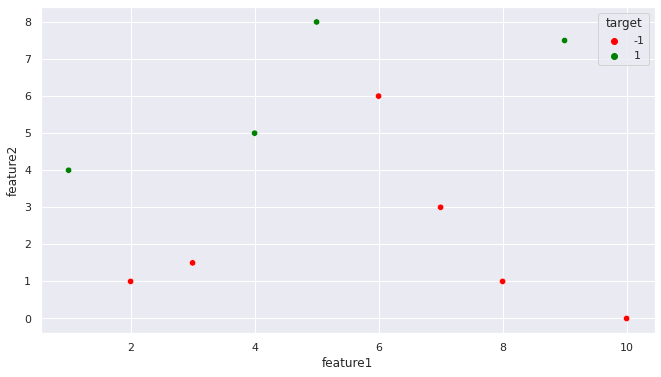

In [4]:
plt.figure(figsize=(11, 6))

sns.scatterplot(data = training_data, x = "feature1", y = "feature2", hue = "target", palette = ["red", "green"], s = 40)
plt.show()

In [5]:
epochs = 100

kp_model = My_Kernelized_Perceptron()

kp_model.fit(data= training_data, kernel_type='linear', epochs= epochs)

100%|██████████| 100/100 [00:03<00:00, 27.72it/s]


In [6]:
weights = kp_model.weights(data= training_data)
print(f"Weights:{weights}\nSlope:{kp_model.slope}\nIntercept:{kp_model.intercept}")

Weights:[-49.   -4.   17.5]
Slope:0.22857142857142856
Intercept:2.8


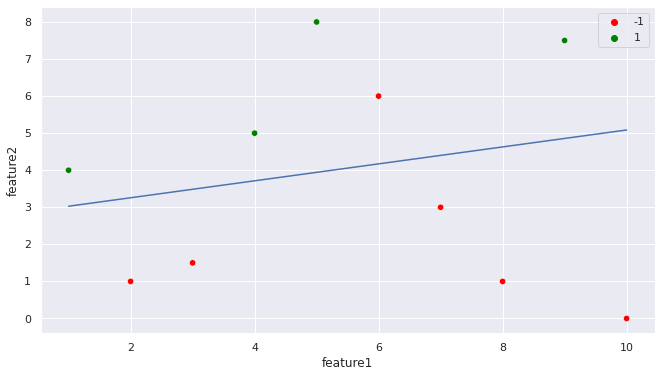

In [7]:
plt.figure(figsize=(11, 6))

m = kp_model.slope
h = kp_model.intercept

training_data['f_pred'] = m * training_data["feature1"] + h

sns.scatterplot(data = training_data, x = "feature1", y = "feature2", hue = "target", palette = ["red", "green"], s = 40)
sns.lineplot(data = training_data, x = "feature1", y = "f_pred")

plt.show()

It tries to find a hyperplane to seperate the data, but since the data is not linearly seperable, it mislabeled one data.

#Polynomial Kernel

In [8]:
x = [i for i in range(1, 11)]
y = [4, 1, 1.5, 5, 8, 6, 3, 1, 7.5, 0]
target = [1, -1, -1, 1, 1, -1, -1, -1, 1, -1]

training_data = pd.DataFrame(None)
training_data["feature1"] = x
training_data["feature2"] = y
training_data["target"] = target

training_data

,feature1,feature2,target
0,1,4.0,1
1,2,1.0,-1
2,3,1.5,-1
3,4,5.0,1
4,5,8.0,1
5,6,6.0,-1
6,7,3.0,-1
7,8,1.0,-1
8,9,7.5,1
9,10,0.0,-1


In [9]:
epochs = 100

kp_model = My_Kernelized_Perceptron()

kp_model.fit(data= training_data, kernel_type='polynomial', epochs= epochs, u= 1, p= 3)

100%|██████████| 100/100 [00:04<00:00, 24.52it/s]


In [10]:
weights = kp_model.weights(data= training_data)
print(f"Weights:{weights}\nSlope:{kp_model.slope}\nIntercept:{kp_model.intercept}")

Weights:[ -34.  -337.   -86.5]
Slope:-3.8959537572254335
Intercept:-0.3930635838150289


There would not be any visualization since we do not know what kind of transformation has been used to map the data from the input space to the feature space.

#RBF Kernel

In [11]:
x = [i for i in range(1, 11)]
y = [4, 1, 1.5, 5, 8, 6, 3, 1, 7.5, 0]
target = [1, -1, -1, 1, 1, -1, -1, -1, 1, -1]

training_data = pd.DataFrame(None)
training_data["feature1"] = x
training_data["feature2"] = y
training_data["target"] = target

training_data

,feature1,feature2,target
0,1,4.0,1
1,2,1.0,-1
2,3,1.5,-1
3,4,5.0,1
4,5,8.0,1
5,6,6.0,-1
6,7,3.0,-1
7,8,1.0,-1
8,9,7.5,1
9,10,0.0,-1


In [12]:
epochs = 100

kp_model = My_Kernelized_Perceptron()

kp_model.fit(data= training_data, kernel_type='rbf', epochs= epochs, gamma = 1)

100%|██████████| 100/100 [00:03<00:00, 26.83it/s]


In [13]:
weights = kp_model.weights(data= training_data)
print(f"Weights:{weights}\nSlope:{kp_model.slope}\nIntercept:{kp_model.intercept}")

Weights:[ 2.  11.  17.5]
Slope:-0.6285714285714286
Intercept:-0.11428571428571428


There would not be any visualization since we do not know what kind of transformation has been used to map the data from the input space to the feature space.